In [84]:
import pandas as pd 
import seaborn as sns
#import gitconfig
import matplotlib.pyplot as plt
import numpy as np


## Data preprocessing:


In [13]:
#env_path = gitconfig.env_path
#env_path
data_df = pd.read_csv(r"C:\Users\shubh\OneDrive\MSU_AI_Bootcamp\Project-2\amazon.csv")
data_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### Replace special characters and columns with number values to numbers

In [14]:
#gather all the columns that need to be converted
cols = ['discounted_price','actual_price','rating','discount_percentage','rating_count'] 

for col in cols:
    #remove the '₹' character from the pricing columns
    data_df[col] = data_df[col].str.replace('[₹]', '', regex=True)
    #remove the '%' character from the discount percentage column
    data_df[col] = data_df[col].str.replace('[%]', '', regex=True)
    #remove the ',' character from the discount percentage column
    data_df[col] = data_df[col].str.replace('[,]', '', regex=True)
    #convert the columns to numerics
    data_df[col] = pd.to_numeric(data_df[col],errors='coerce')

data_df


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",

In [15]:
# understand the shape of the dataset
data_df.shape


(1465, 16)

In [16]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [17]:
# check for missing values
data_df.isnull().sum()


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [18]:
# list the rows that contain missing values in the rating_count column
data_df[data_df['rating_count'].isnull()]


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [19]:
# remove the rows with missing values in the rating_count column
data_df.dropna(subset=['rating_count'], inplace=True)


In [20]:
data_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [21]:
# if there are any duplicates in product_id
data_df['product_id'].duplicated().any()


True

In [22]:
# "True" means some rows share same product ids
duplicate_rows = data_df[data_df['product_id'].duplicated(keep=False)]
print(duplicate_rows['product_id'] )

0       B07JW9H4J1
1       B098NS6PVG
2       B096MSW6CT
3       B08HDJ86NZ
4       B08CF3B7N1
           ...    
1007    B0B9BXKBC7
1010    B07GVGTSLN
1017    B0B9BD2YL4
1018    B0BMXMLSMM
1019    B0141EZMAI
Name: product_id, Length: 206, dtype: object


In [23]:
# combine duplicates
data_df= data_df.groupby('product_id').agg({
    'product_name': 'first',  # use the first product name
    'category': 'first',  
    'discounted_price': 'first',
    'actual_price': 'first',
    'discount_percentage': 'first',
    'rating': 'mean',  # take the average rating
    'rating_count': 'sum',  # sum up the rating counts for duplicates
    'about_product': lambda x: ','.join(x), 
    'user_id': lambda x: ','.join(x), 
    'user_name': lambda x: ','.join(x), 
    'review_id': lambda x: ','.join(x), 
    'review_title': lambda x: ','.join(x), 
    'review_content': lambda x: ','.join(x), 
}).reset_index()


In [24]:
# create new columns: Level 1 to Level 3 Categories
data_df['first_category'] = data_df['category'].astype(str).str.split('|').str[0]
data_df['second_category'] =data_df['category'].astype(str).str.split('|').str[-1]
data_df['third_category'] = data_df['category'].astype(str).str.split('|').str[-2]


In [25]:
data_df.info()
data_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1349 non-null   object 
 1   product_name         1349 non-null   object 
 2   category             1349 non-null   object 
 3   discounted_price     1349 non-null   float64
 4   actual_price         1349 non-null   float64
 5   discount_percentage  1349 non-null   int64  
 6   rating               1348 non-null   float64
 7   rating_count         1349 non-null   float64
 8   about_product        1349 non-null   object 
 9   user_id              1349 non-null   object 
 10  user_name            1349 non-null   object 
 11  review_id            1349 non-null   object 
 12  review_title         1349 non-null   object 
 13  review_content       1349 non-null   object 
 14  first_category       1349 non-null   object 
 15  second_category      1349 non-null   o

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,first_category,second_category,third_category
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507.0,1208.0,58,4.1,16262.0,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,Computers&Accessories,WirelessUSBAdapters,NetworkAdapters
1,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,749.0,1339.0,44,4.2,179692.0,150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,Computers&Accessories,WirelessUSBAdapters,NetworkAdapters
2,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,399.0,499.0,20,4.3,27201.0,Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",Electronics,RechargeableBatteries,GeneralPurposeBatteries&BatteryChargers
3,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,279.0,375.0,26,4.3,31534.0,"A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",Computers&Accessories,Mice,"Keyboards,Mice&InputDevices"
4,B004IO5BMQ,"Logitech M235 Wireless Mouse, 1000 DPI Optical...",Computers&Accessories|Accessories&Peripherals|...,699.0,995.0,30,4.5,54405.0,You can surf the Web with more comfort and eas...,"AGIOL4B6EPMZ63RZQFWZWI33O2EA,AG33OJYQIXPPS7CON...","Chandrashekar SK,Mohammed Ashfaque,Arif Hussai...","R28ZB0YUM6FKKB,RNB44LXBJIPTL,RVSWATRY0CJIV,R3I...","Good silent mouse,Too small to hold!,Reviewing...",It's little small for big hands. But best avai...,Computers&Accessories,Mice,"Keyboards,Mice&InputDevices"


Exploratory Data Analysis (EDA)

In the second part, we will use different analysis and plots to uncover meaningful insights, incliding: rating distribution analysis, categorical analysis, summary and key insights.

Rating Distribution Analysis
Objective: Analyze the distribution of product ratings and how they correlate with other factors like price and sales.



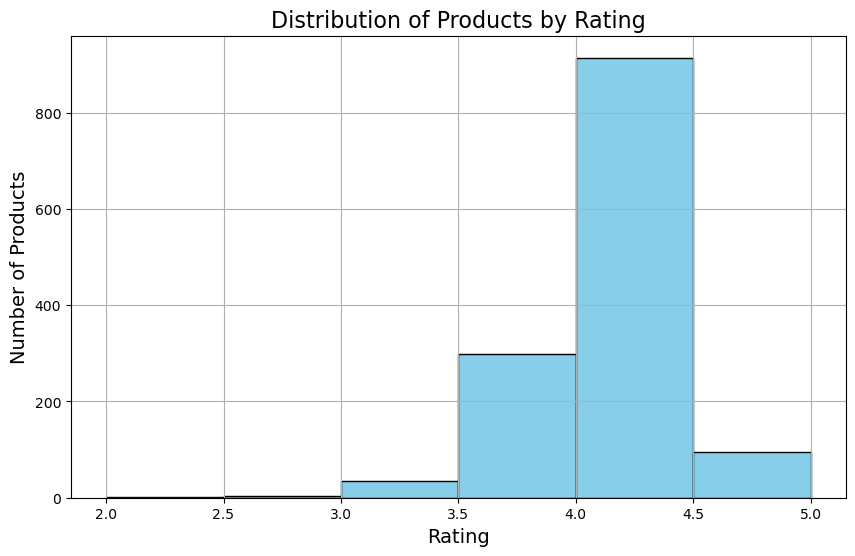

,Rating Range,Number of Products
0,2.0 - 2.5,1
1,2.5 - 3.0,7
2,3.0 - 3.5,57
3,3.5 - 4.0,432
4,4.0 - 4.5,823
5,4.5 - 5.0,27


In [27]:
# Define the bins with an interval of 0.5
bins = np.arange(data_df['rating'].min(), data_df['rating'].max() + 0.5, 0.5)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(data_df['rating'], bins=bins, edgecolor='black', color='skyblue')

# Add titles and labels
plt.title('Distribution of Products by Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)

# Show the plot
plt.grid(True)  # add gridlines to the plot
plt.show()

# Digitize the ratings into bins
data_df['rating_bin'] = np.digitize(data_df['rating'], bins, right=True)

# Count the number of products in each bin, ensuring all bins are represented
rating_summary = data_df.groupby('rating_bin')['rating'].count().reindex(range(1, len(bins)), fill_value=0)

bin_ranges = [f'{bins[i]} - {bins[i+1]}' for i in range(len(bins)-1)]
pd.DataFrame({'Rating Range': bin_ranges, 'Number of Products': rating_summary.values})



The histogram plot above illustrates the distribution of product ratings. The majority of products have a rating between 4.0 and 4.5, indicating that most products are highly rated. A smaller number of products fall into the 3.5 to 4.0 rating range, and very few products have ratings below 3.5 or above 4.5. This suggests that the products tend to have generally positive reviews, with the highest concentration around the 4.0 to 4.5 rating bracket.



In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [29]:
##Data Importing 
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 10)
y = 3 * X[:, 0] + 2 * X[:, 2] + np.random.randn(100)

In [30]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}


In [32]:
# Function to calculate adjusted R²
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

In [33]:
# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate R²
    r2 = r2_score(y_test, y_pred)
    
    # Calculate adjusted R²
    n = X_test.shape[0]  # number of samples
    p = X_test.shape[1]  # number of features
    adj_r2 = adjusted_r2_score(r2, n, p)
    
    # Store results
    results[name] = {"R²": r2, "Adjusted R²": adj_r2}

In [34]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                         R²  Adjusted R²
Linear Regression  0.690990     0.347647
Ridge Regression   0.694038     0.354080
Lasso Regression   0.515548    -0.022733


In [36]:
X = data_df.iloc[:,3].values.reshape(-1,1)
y = data_df.iloc[:,2].values.reshape(-1,1)

In [37]:
X


array([[ 507.],
       [ 749.],
       [ 399.],
       ...,
       [1299.],
       [ 279.],
       [1439.]])

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [43]:
# Example if X_train is one-dimensional
X_train = X_train.reshape(-1, 1)

In [46]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [49]:
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature
y = 2.5 * X.flatten() + np.random.randn(100) * 2  # Linear relation with some noise

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train, y_train)

LinearRegression()

In [50]:
reg.coef_

array([2.41972946])

In [51]:
reg.intercept_

0.28582663891713267

In [52]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

y_predict = reg.predict(X_test)
print('R2 Score:',r2_score(y_test,y_predict))

R2 Score: 0.9545718935323327


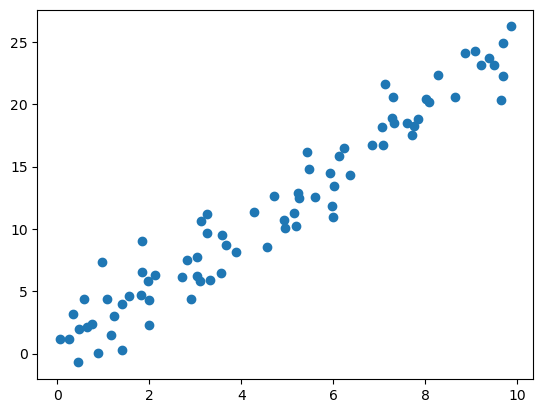

In [53]:
plt.scatter(X_train,y_train)

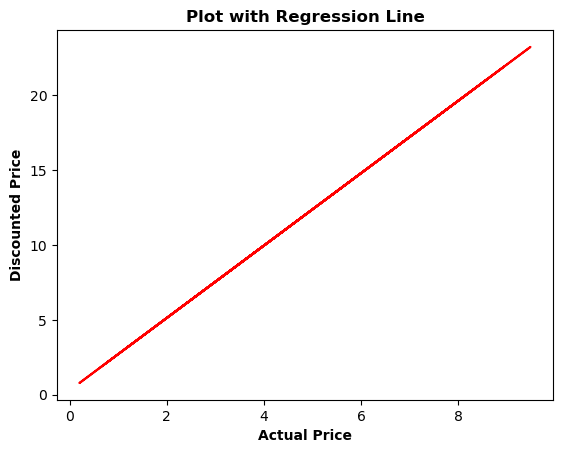

In [54]:
plt.plot(X_test,y_predict,color='red')
plt.xlabel('Actual Price',fontweight='bold')
plt.ylabel('Discounted Price',fontweight='bold')
plt.title('Plot with Regression Line',fontweight='bold')
plt.show()

In [55]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=10,shuffle=True,random_state=11)
cv_result = cross_val_score(reg,X,y,cv=kf).mean()
print('Cross Validation Results Mean:',cv_result)

Cross Validation Results Mean: 0.922501157211794


In [59]:
data_df['rating_count'].fillna(data_df['rating_count'].mode()[0],inplace=True)

In [63]:
# Lass0
from sklearn.linear_model import Lasso

In [69]:


X = data_df[['actual_price','rating','rating_count']]
y = data_df['discounted_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [71]:
# Drop rows with missing values (if appropriate)
X_train = X_train.dropna()
y_train = y_train[:len(X_train)]  # Ensure y matches X in size

X_test = X_test.dropna()
y_test = y_test[:len(X_test)]  # Ensure y matches X in size

In [72]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

lasso_predict = lasso.predict(X_test)
print('Lasso score:',lasso.score(X_test,y_test))
print('Lasso coefficients:',lasso.coef_)

#Ridge Regression

from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)
ridge_predict = ridge.predict(X_test)
print('Ridge score: ',ridge.score(X_test, y_test))

Lasso score: 0.7916608841112361
Lasso coefficients: [ 3.85104006e-01  6.40652430e+02 -9.80805017e-04]
Ridge score:  0.7916589659690524


In [74]:
reg2 = LinearRegression()
reg2.fit(X_train,y_train)

y_predict = reg2.predict(X_test)
print('R2 Score:',r2_score(y_test,y_predict))

R2 Score: 0.7916561484713929


In [77]:
data_df = data_df.dropna(subset=['actual_price', 'rating', 'rating_count', 'discounted_price'])


In [78]:
from sklearn.impute import SimpleImputer

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')

# Impute the features with missing values
data_df[['actual_price', 'rating', 'rating_count']] = imputer.fit_transform(
    data_df[['actual_price', 'rating', 'rating_count']]
)

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define features and target variable
X2 = data_df[['actual_price', 'rating', 'rating_count']]
y2 = data_df['discounted_price']

# Scale the features
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=11, test_size=0.3)

# Fit the Linear Regression model
regss = LinearRegression()
regss.fit(X2_train, y2_train)

# Make predictions
y2_predict = regss.predict(X2_test)

# Calculate and print the R2 score
print('R2 Score:', r2_score(y2_test, y2_predict))


R2 Score: 0.9250966591503342


In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X2 = data_df[['actual_price','rating','rating_count']]
y2 = data_df['discounted_price']

X2 = scaler.fit_transform(X2)

X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,random_state = 11,test_size=0.3)

regss = LinearRegression()
regss.fit(X2_train,y2_train)

y2_predict = regss.predict(X2_test)

print('R2 Score:',r2_score(y2_test,y2_predict))

R2 Score: 0.9250966591503342


In [81]:
ols_data = data_df[['discounted_price','actual_price']]
ols_formula = 'discounted_price ~ actual_price'

In [82]:
from statsmodels.formula.api import ols

OLS = ols(formula=ols_formula,data=ols_data)
model=OLS.fit()

In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       discounted_price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 1.683e+04
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        08:31:15   Log-Likelihood:                -12127.
No. Observations:                1348   AIC:                         2.426e+04
Df Residuals:                    1346   BIC:                         2.427e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -197.4810     59.719     -3.307      0.001    -314.634     -80.328
actual_price     0.6153      0.005    129.722      0.000       0.606       0.625
==============================================================================
Omnibus:                      485.192   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53548.208
Skew:                          -0.642   Prob(JB):                         0.00
Kurtosis:                      33.850   Cond. No.                     1.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""